In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('driver-data.csv')

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4000.0,3.423312e+09,1154.844867,3.423310e+09,3.423311e+09,3.423312e+09,3.423313e+09,3.423314e+09
mean_dist_day,4000.0,7.604152e+01,53.469563,1.552000e+01,4.524750e+01,5.333000e+01,6.563250e+01,2.447900e+02
mean_over_speed_perc,4000.0,1.072100e+01,13.708543,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.000000e+02


In [8]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [12]:
df.drop('id',axis=1,inplace=True)

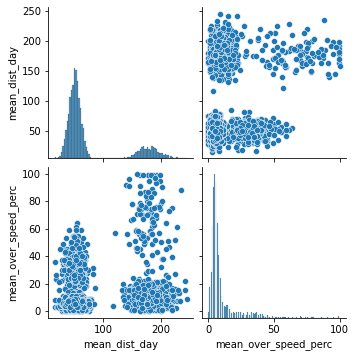

In [15]:
sns.pairplot(df)

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmodel= KMeans(n_clusters=2)

In [18]:
kmodel.fit(df)

KMeans(n_clusters=2)

In [19]:
kmodel.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [23]:
kmodel.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
df['cluster_labels']= kmodel.labels_

In [25]:
df.head()

,mean_dist_day,mean_over_speed_perc,cluster_labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [26]:
df.tail(30)

,mean_dist_day,mean_over_speed_perc,cluster_labels
3970,180.29,20,1
3971,222.08,11,1
3972,165.10,13,1
3973,212.75,9,1
3974,170.64,13,1
3975,196.20,14,1
3976,189.99,12,1
3977,208.96,10,1
3978,219.39,1,1
3979,188.25,10,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


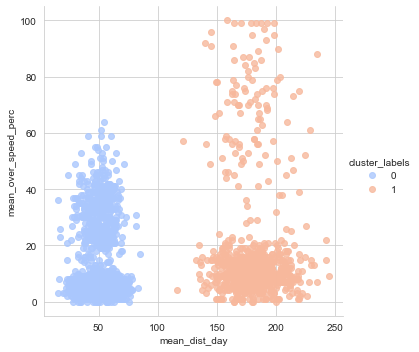

In [32]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',\
           data=df,hue='cluster_labels',
           palette='coolwarm',fit_reg=False)

In [33]:
wcss = []

for i in range(1,10):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(df)
    wcss.append(kmeans1.inertia_)

Text(0, 0.5, 'WCSS')

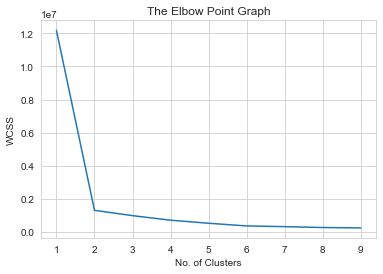

In [35]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')

Thus we can infer that 2 Clusters are best for the given dataset